In [ ]:
# Link to website used
# https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/

In [14]:
# Artificial dogs used in self-made dataset

# Snoopy (Charlie Brown)
# Scooby Doo (Scooby Doo)
# Lillipup (Pokemon)
# Rockruff (Pokemon)
# Spike (Tom and Jerry)
# Pluto (Mickey Mouse)
# Blue (Blues Clues)
# Bolt (Bolt)
# Max (Secret Life of Pets)
# Odie (Garfield)
# Clifford (Clifford the Big Red Dog)
# Martha (Martha Speaks)
# Dug (Up)
# Spike (Rugrats)
# Houndoom (Pokemon)
# 

In [59]:
# import libraries

import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Image Prep

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = 'cats_and_dogs_filtered'
print(os.getcwd())
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'artificial')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'artificial')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

/Users/kobelin/Desktop/pretrainedmodel


/Users/kobelin/Desktop/pretrainedmodel


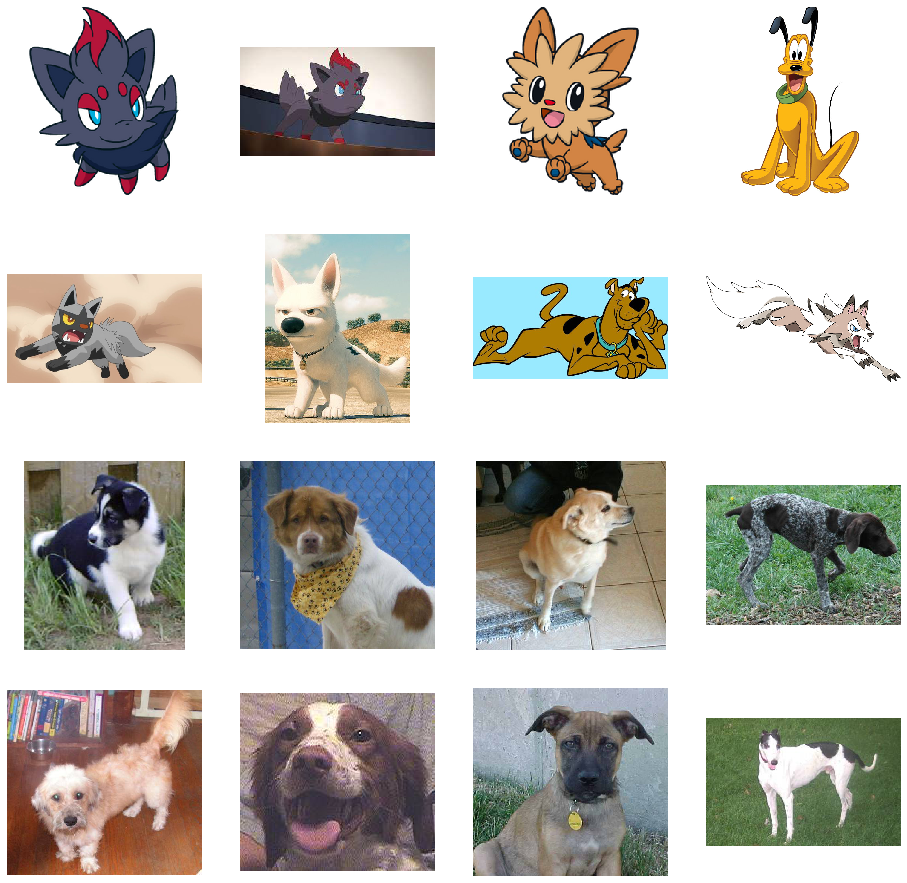

In [5]:
# Check if the images loaded properly

# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100

print(os.getcwd())
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )


next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [4]:
### TRAINING FOR VGG-16 MODEL

# DRAWBACK: Takes a long time to train

In [95]:
# STEP 1: IMAGE AUGMENTATION

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [96]:
# STEP 2: TRAINING AND VALIDATION SETS

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( validation_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 1137 images belonging to 2 classes.
Found 566 images belonging to 2 classes.


In [97]:
# STEP 3: LOAD THE BASE MODEL

from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3)) # Shape of our images
include_top = False # Leave out the last fully connected layer

# because we don't have to train every layer, we make them non_trainable
for layer in base_model.layers:
    layer.trainable = False

In [98]:
# STEP 4: COMPILE AND FIT

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])


In [99]:
# STEP 5: BUILD FINAL MODEL

vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
 19/100 [====>.........................] - ETA: 9:17 - loss: 0.6749 - acc: 0.8526

/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 31/100 [========>.....................] - ETA: 7:52 - loss: 0.6692 - acc: 0.8484

KeyboardInterrupt: 

In [40]:
# Check if the images loaded properly

# Set up matplotlib fig, and size it to fit 4x4 pics
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100

print(os.getcwd())
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

validation_cat_fnames = os.listdir( validation_cats_dir )
validation_dog_fnames = os.listdir( validation_dogs_dir )


next_cat_pix = [os.path.join(validation_cats_dir, fname) 
                for fname in validation_cat_fnames]

next_dog_pix = [os.path.join(validation_dogs_dir, fname) 
                for fname in validation_dog_fnames]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    #   sp = plt.subplot(nrows, ncols, i + 1)
    #   sp.axis('Off') # Don't show axes (or gridlines)
    if ".DS_Store" in img_path:
        continue
    try:
      img = mpimg.imread(img_path)
    except:
        print(img_path)

    #   plt.imshow(img)

    # plt.show()

/Users/kobelin/Desktop/pretrainedmodel


<Figure size 1152x1152 with 0 Axes>

In [ ]:
### TRAINING FOR GOOGLE INCEPTION MODEL

# Seems to be faster than the VGG-16 model

In [41]:
# STEP 1: DATA AUGMENTATION

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [42]:
# STEP 2: TRAINING AND VALIDATION GENERATORS

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))


Found 1137 images belonging to 2 classes.
Found 566 images belonging to 2 classes.


In [43]:
# STEP 3: LOADING THE BASE MODEL

from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')


In [44]:
# STEP 4: COMPILE AND FIT

# Just like the VGG-16 Model, only train/change the last layer

for layer in base_model.layers:
    layer.trainable = False

In [45]:
# STEP 4 CONTINUED

from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [46]:
# STEP 4 CONTINUED

inc_history = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 55, epochs = 10)


Epoch 1/10
55/55 [==============================] - 110s 1s/step - loss: 0.7834 - acc: 0.9170 - val_loss: 1.2403 - val_acc: 0.5601
Epoch 2/10
55/55 [==============================] - 80s 1s/step - loss: 0.2221 - acc: 0.9517 - val_loss: 0.0344 - val_acc: 0.9912
Epoch 3/10
55/55 [==============================] - 68s 1s/step - loss: 0.1886 - acc: 0.9708 - val_loss: 0.0698 - val_acc: 0.9929
Epoch 4/10
55/55 [==============================] - 68s 1s/step - loss: 0.2470 - acc: 0.9699 - val_loss: 0.0796 - val_acc: 0.9859
Epoch 5/10
55/55 [==============================] - 67s 1s/step - loss: 0.1705 - acc: 0.9690 - val_loss: 0.0926 - val_acc: 0.9841
Epoch 6/10
55/55 [==============================] - 68s 1s/step - loss: 0.1493 - acc: 0.9754 - val_loss: 0.1276 - val_acc: 0.9647
Epoch 7/10
55/55 [==============================] - 65s 1s/step - loss: 0.0878 - acc: 0.9854 - val_loss: 0.0568 - val_acc: 0.9929
Epoch 8/10
55/55 [==============================] - 64s 1s/step - loss: 0.1217 - acc: 0.9

In [48]:
model.save("model.h5")

In [ ]:
### TRAINING FOR RESNET50 MODEL

In [85]:
# STEP 1: DATA AUGMENTATION AND GENERATORS

# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))


Found 1137 images belonging to 2 classes.
Found 566 images belonging to 2 classes.


In [86]:
# STEP 2: IMPORT THE BASE MODEL

from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")


# once again only working with the last layer

for layer in base_model.layers:
    layer.trainable = False

94781440/94765736 [==============================] - 6s 0us/step


In [93]:
# STEP 3: BUILD AND COMPILE THE MODEL

from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

base_model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

TypeError: 'module' object is not callable

In [ ]:
# STEP 4: FIT THE MODEL

resnet_history = base_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

In [ ]:
### TRAINING FOR EFFICIENTNET MODEL

In [82]:
# import the model

import efficientnet.keras as efn

In [83]:
# STEP 1: IMAGE AUGMENTATION

# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 1137 images belonging to 2 classes.
Found 566 images belonging to 2 classes.


In [84]:
# STEP 2: LOAD THE BASE MODEL 

base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

# only work with the last layer

for layer in base_model.layers:
    layer.trainable = False

AttributeError: module 'keras.utils' has no attribute 'get_file'

In [ ]:
# STEP 3: BUILD THE MODEL

x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
predictions = Dense(1, activation="sigmoid")(x)
model_final = Model(input = base_model.input, output = predictions)

In [ ]:
# STEP 4: COMPILE AND FIT THE DATA

model_final.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# STEP 4 CONTINUED

eff_history = model_final.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)